In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys; sys.path.append('..')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from src.data_utils import get_dataset, cifar10_label_names
from src.simple_utils import load_pickle
from plot_utils import stacksimple
from jupyter_preproc import smoothen

import os
from os.path import join

rng = np.random.default_rng(5)

In [39]:
dnames = {0: "CIFAR10-neg", 1: "CIFAR10-neg-bal", 2: "CIFAR10-easy", 3: "CIFAR10-hard"}
gnames = {0: 'Resnet18', 1: 'Densenet121'}

dname = dnames[0]
gname = gnames[0]

print("loading dataset")
dataset = get_dataset('../data', dname)
data_x = dataset.data_x
data_y = dataset.data_y
class_names = cifar10_label_names
print("done")

loading dataset
reading data from /home/jupyter/dist-shift/data
done


In [40]:
groups = load_pickle('../processed/cifar5m_subsets.pkl')
print(groups.keys())

dict_keys(['CIFAR10-neg-bal', 'CIFAR10-hard', 'CIFAR10-easy', 'CIFAR10-neg'])


In [41]:
G = groups[dname][gname]
G.keys()
NUM_SAMPLES, NUM_CLASSES, NUM_CHECKPOINTS = G['probs'].shape

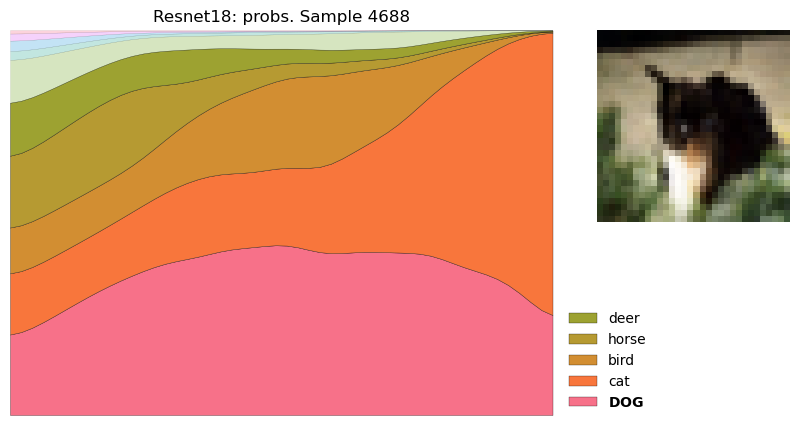

In [42]:
## parameters
t = 'probs'
smooth = True
num_gridpts = 50 # num pts on x-axis
sigma = 2.0

## generate plot
xkey = 'x'

## random plot
i = rng.choice(range(NUM_SAMPLES)) # random image index
sns.reset_defaults()
mpl.rcParams['font.family'] = 'sans-serif'

res = smoothen(G, xkey, t, i)

xx = res[f'{xkey}_grid']
yy = res[f'{t}_smooth']
    
f = stacksimple(i, xx, yy, dataset, class_names) # the actual plot
f.axes[0].set_title(f'{gname}: {t}. Sample {i}');
plt.show()

plane


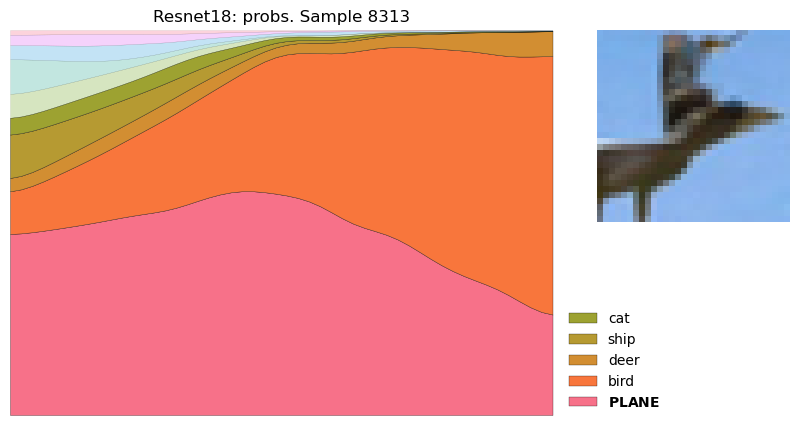

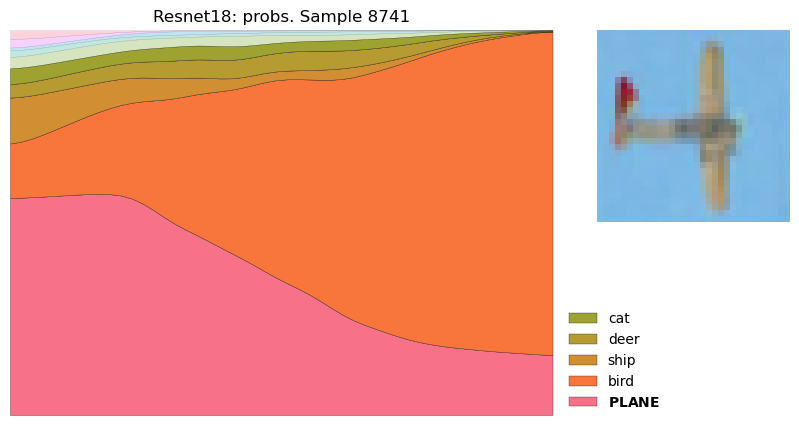

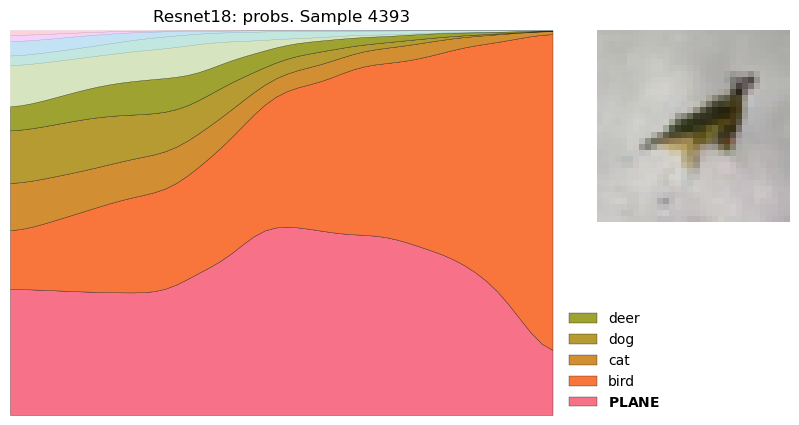

car


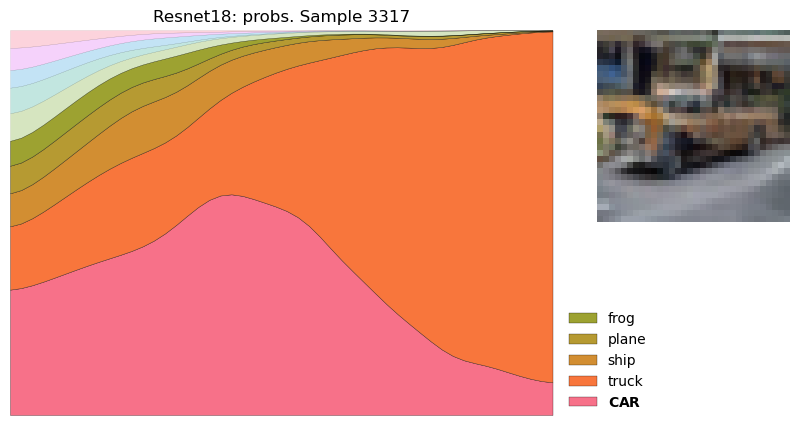

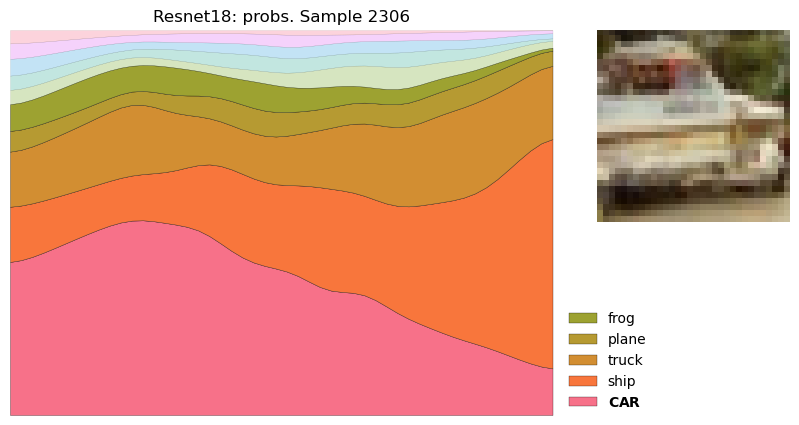

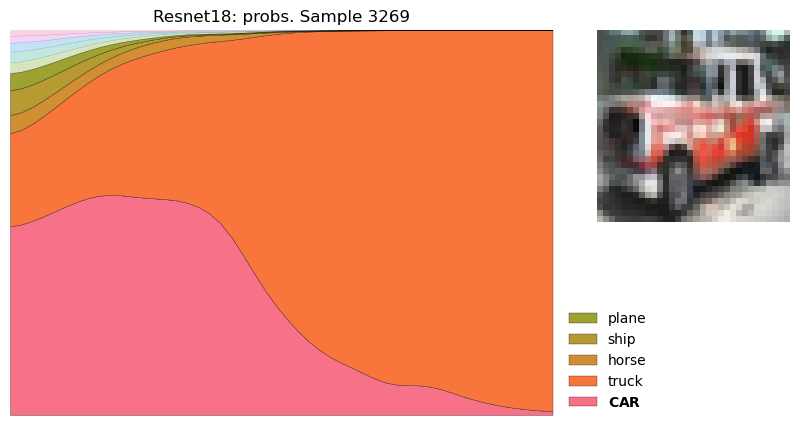

bird


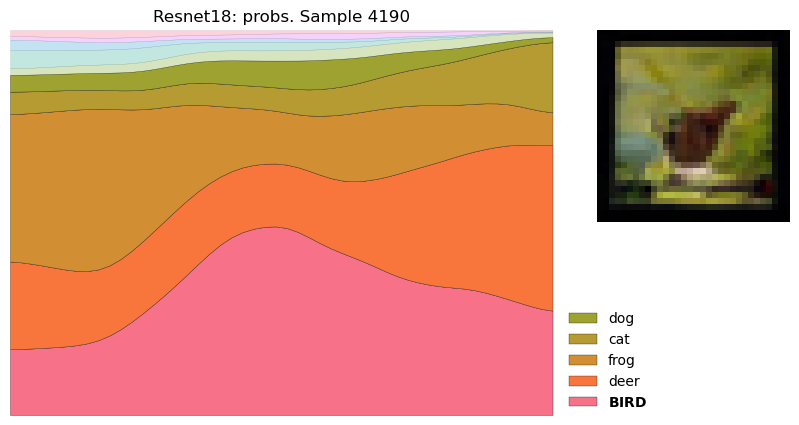

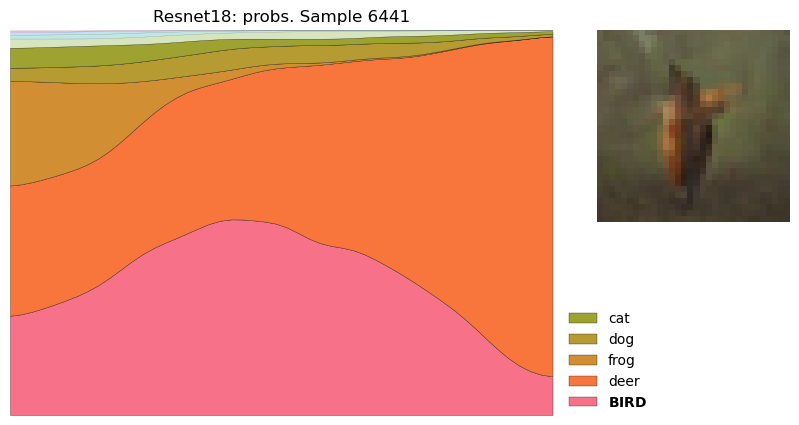

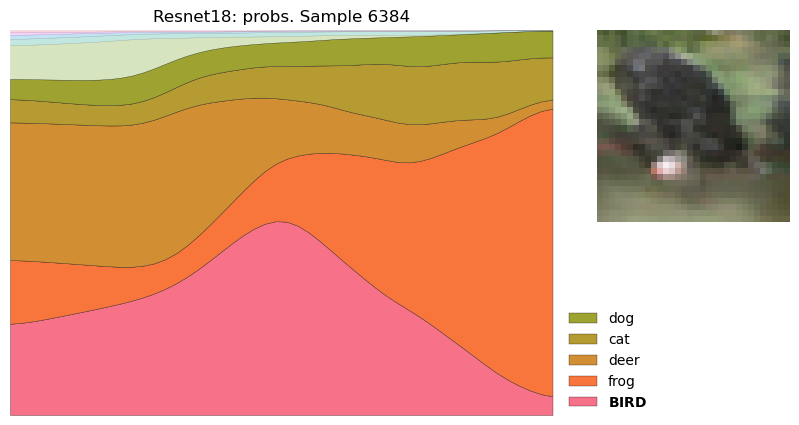

cat


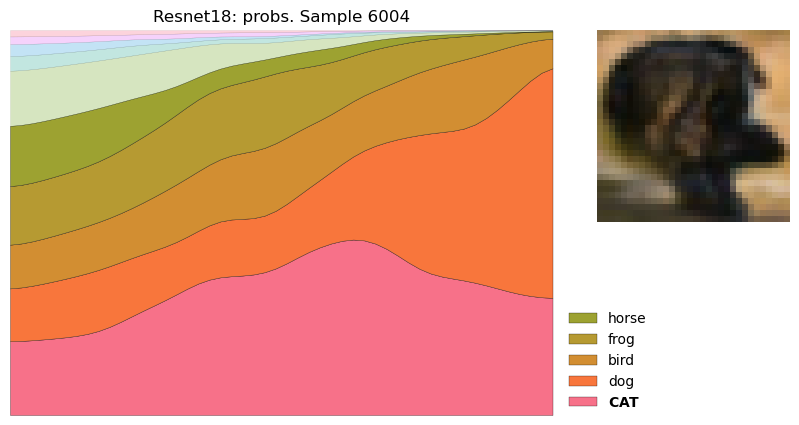

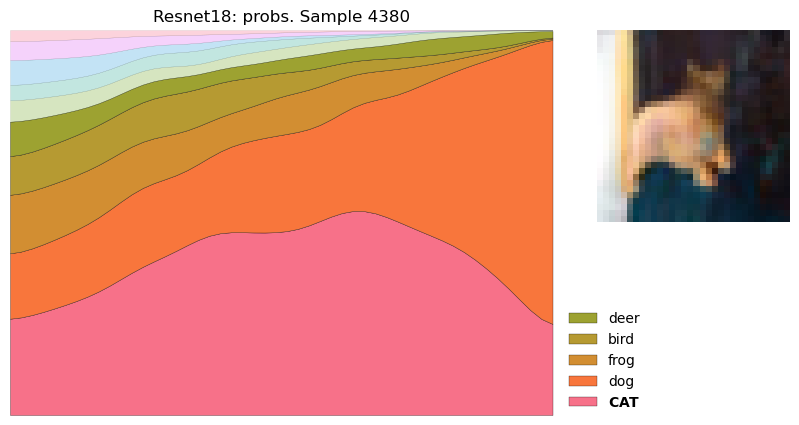

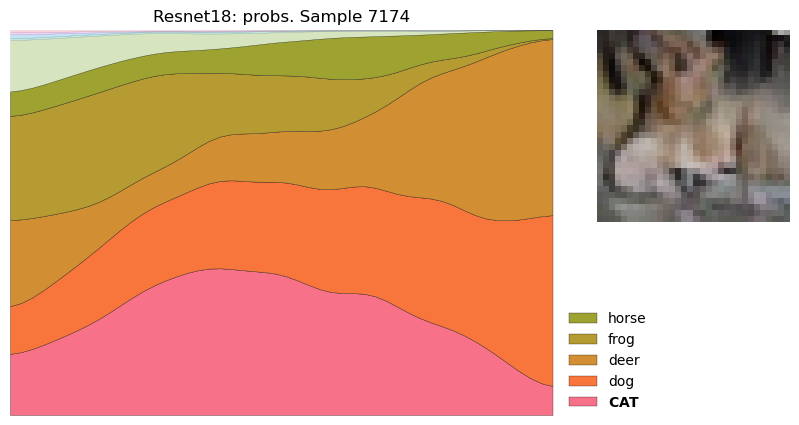

deer


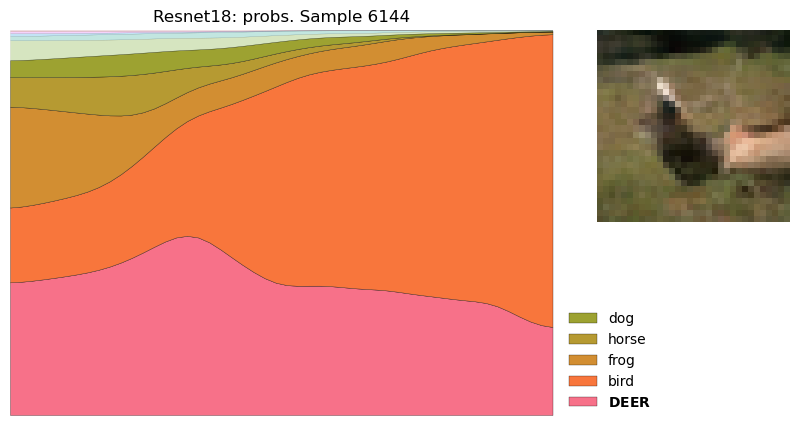

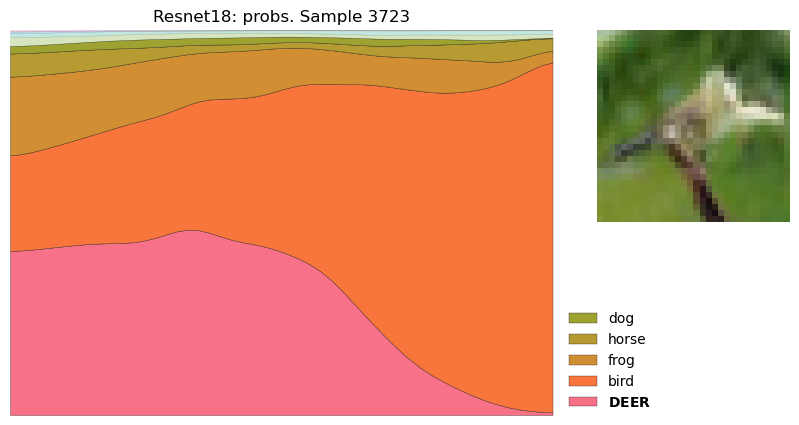

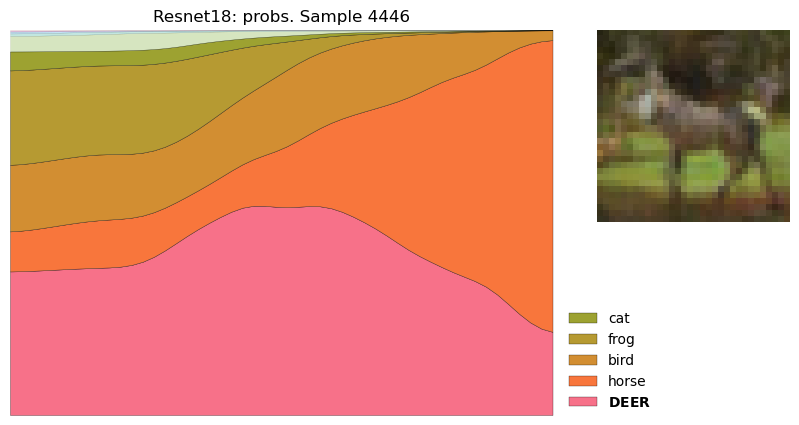

dog


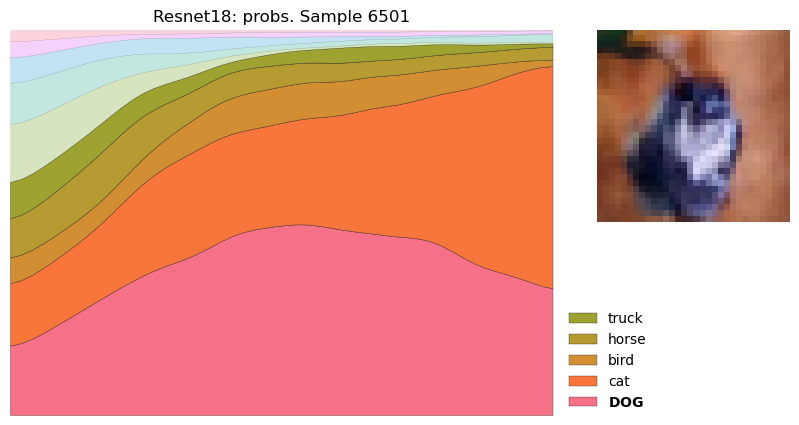

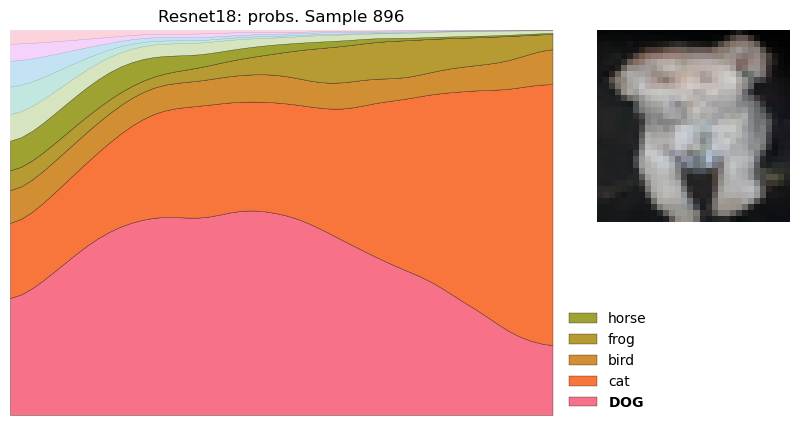

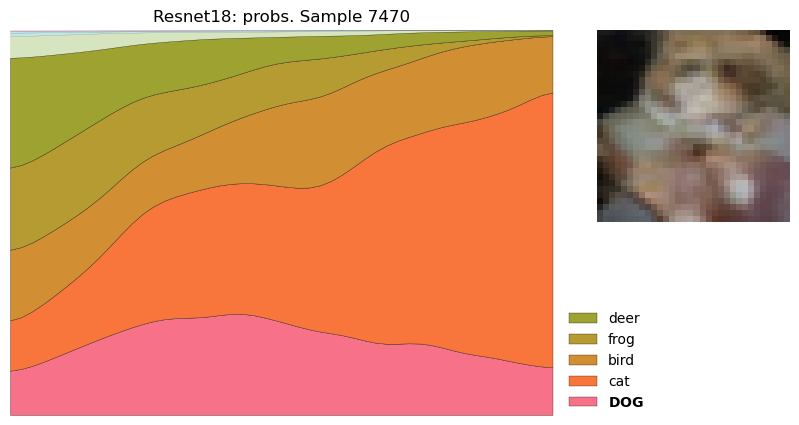

frog


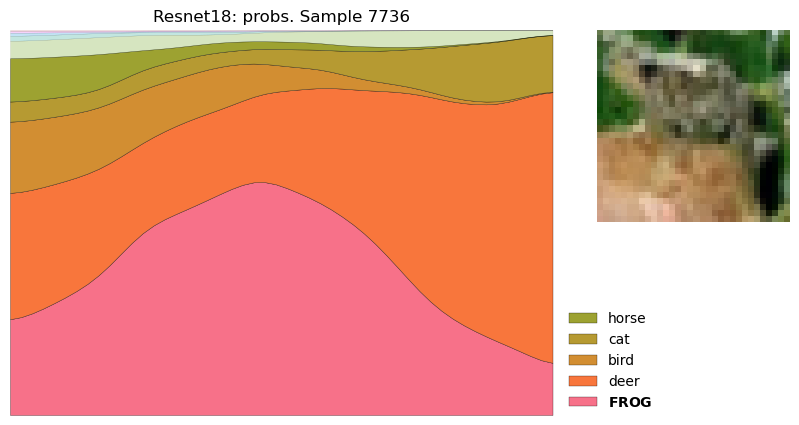

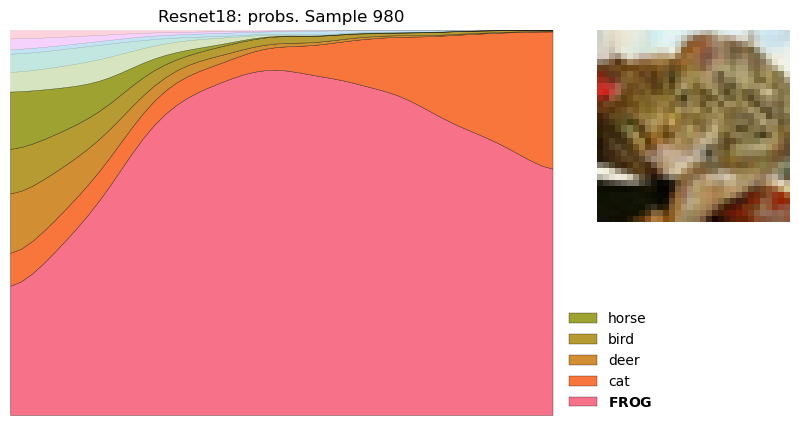

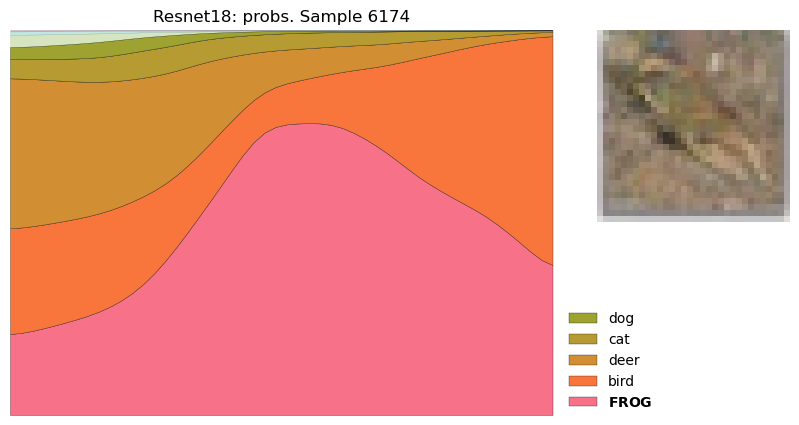

horse


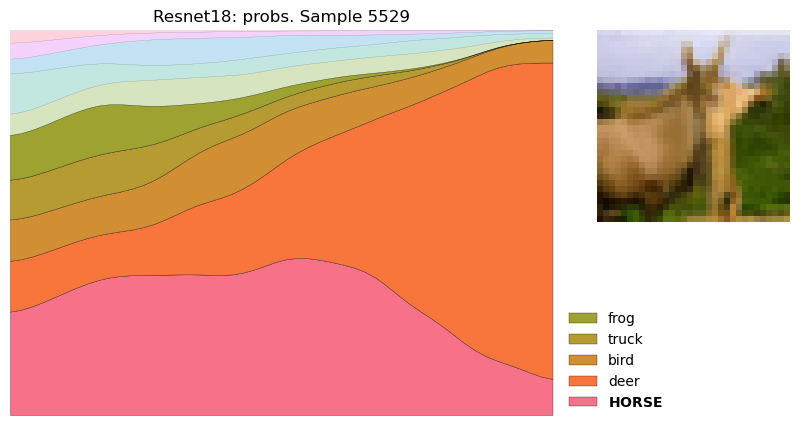

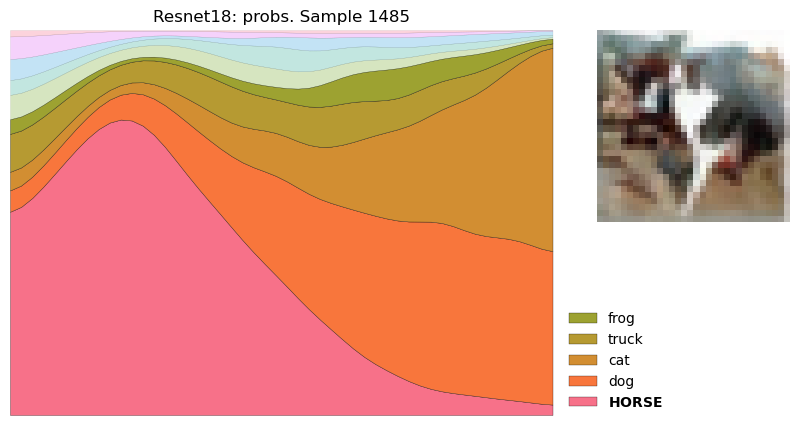

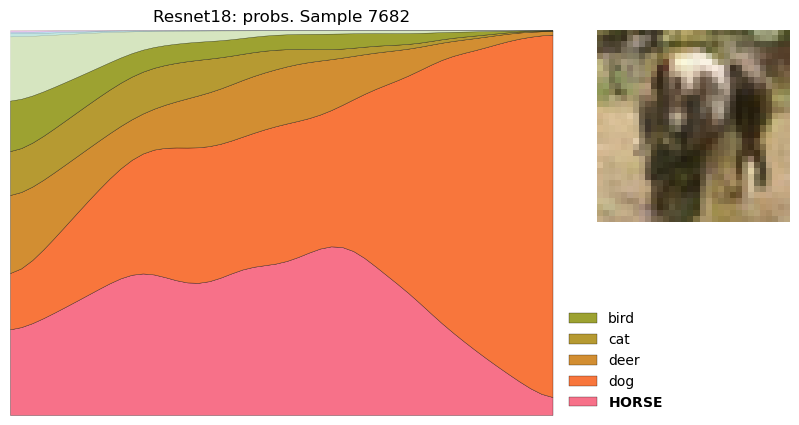

ship


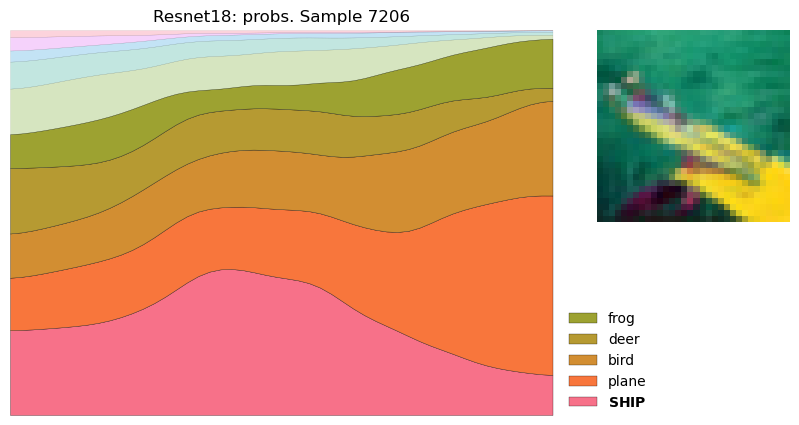

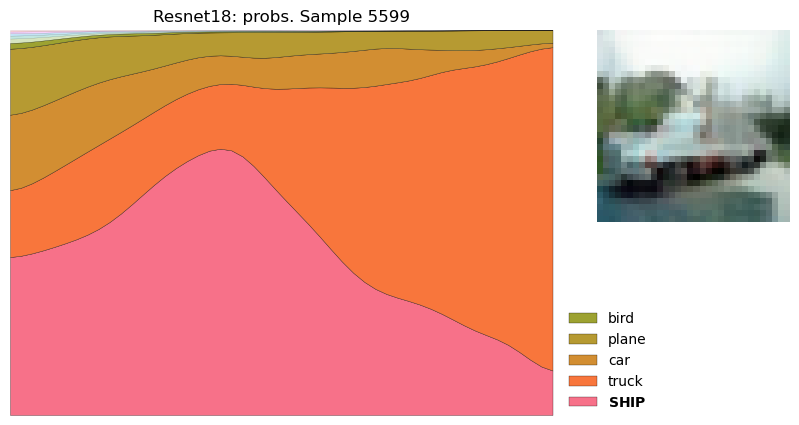

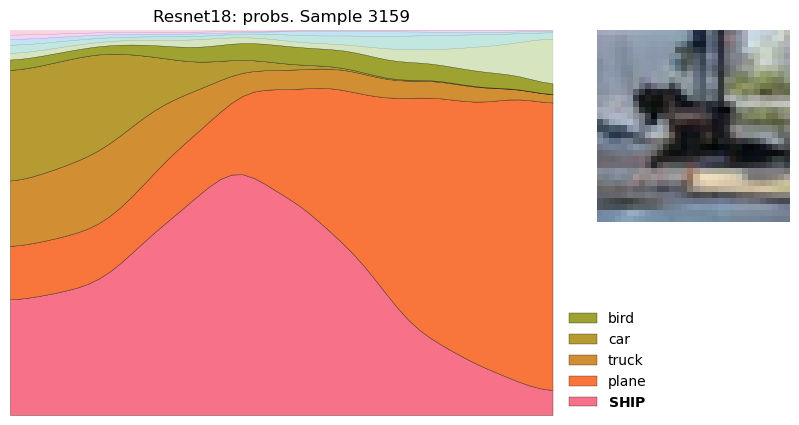

truck


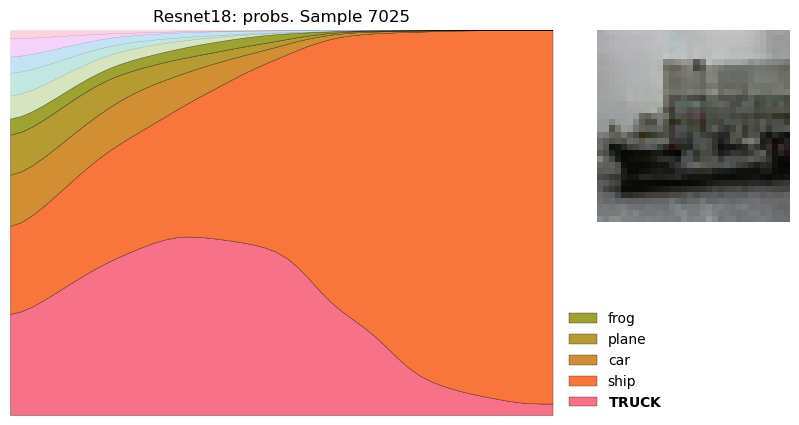

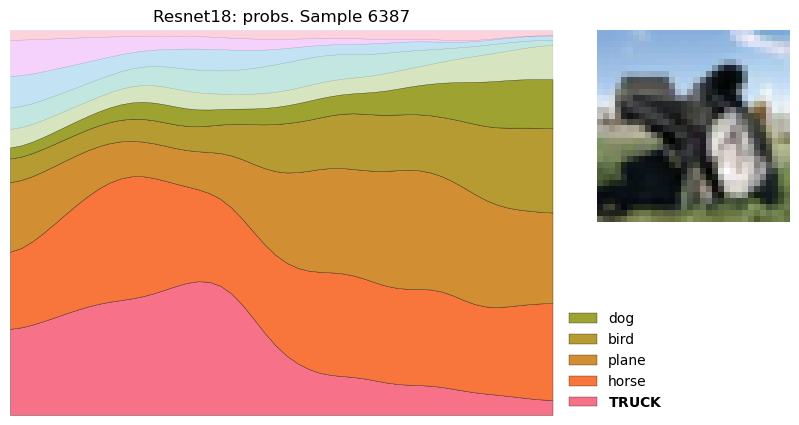

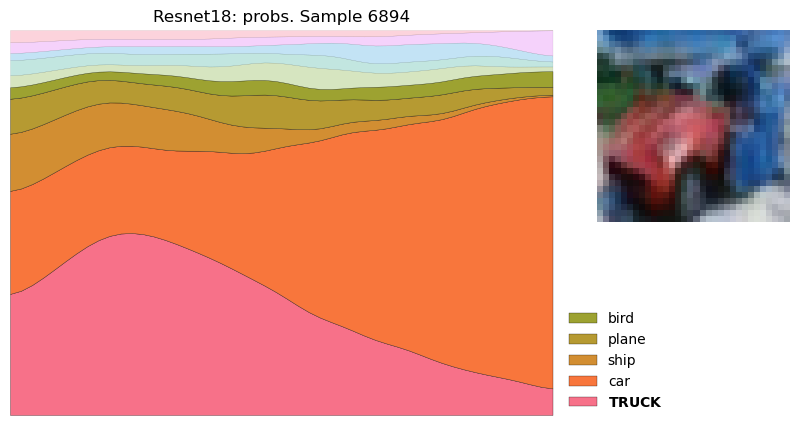

In [43]:
n = 3

num_classes = len(class_names)

for k in range(num_classes):
    print(class_names[k])
    
    class_idx = np.where(data_y == k)[0]
    if len(class_idx) < n:
        continue
    class_idx_sub = class_idx[np.random.choice(len(class_idx), size=n, replace=False)]

    for i in range(n):
        idx = class_idx_sub[i]
        res = smoothen(G, xkey, t, idx)

        xx = res[f'{xkey}_grid']
        yy = res[f'{t}_smooth']
        f = stacksimple(idx, xx, yy, dataset, class_names) # the actual plot
        f.axes[0].set_title(f'{gname}: {t}. Sample {idx}');
        plt.show()